## FNGU https://www.bmoetns.com/Documents/FNGU/Fact_Sheet.pdf

### decent tutorial: https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/

notes: get corr on relavent dates only


TODO: https://en.wikipedia.org/wiki/Vector_autoregression


example at end of: https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/


example: https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

boston housing with vector autoregression

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
!pip install pandas-datareader
from pandas_datareader import data as pdr
!pip install fix-yahoo-finance
import fix_yahoo_finance as yf


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import pandas_datareader.data as web
import datetime
 
  
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

plt.style.use('fivethirtyeight')  
  
  
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()

Populating the interactive namespace from numpy and matplotlib


# pretty fucking useless right?... 

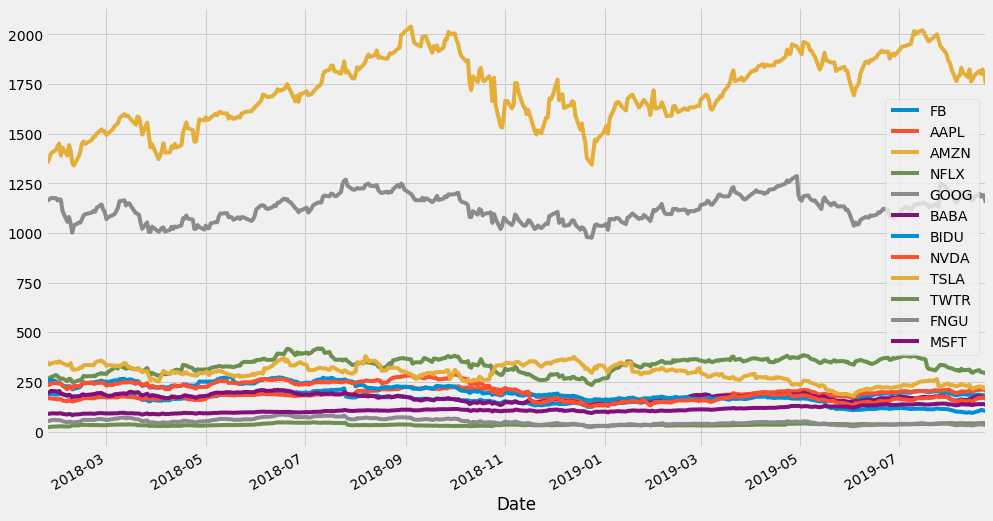

In [ ]:
AAPL = web.DataReader("AAPL", "yahoo", start, end)
NFLX = web.DataReader("NFLX", "yahoo", start, end)
GOOG = web.DataReader("GOOG", "yahoo", start, end)
FB = web.DataReader("FB", "yahoo", start, end)
AMZN = web.DataReader("AMZN", "yahoo", start, end)
BABA = web.DataReader("BABA", "yahoo", start, end)
BIDU = web.DataReader("BIDU", "yahoo", start, end)
NVDA = web.DataReader("NVDA", "yahoo", start, end)
TSLA = web.DataReader("TSLA", "yahoo", start, end)
TWTR = web.DataReader("TWTR", "yahoo", start, end)

FNGU = web.DataReader("FNGU", "yahoo", start, end)

MSFT = web.DataReader("MSFT", "yahoo", start, end)

stocks = pd.DataFrame({
                      "FB"  : FB["Adj Close"],
                      "AAPL": AAPL["Adj Close"],
                      "AMZN": AMZN["Adj Close"],
                      "NFLX": NFLX["Adj Close"],
                      "GOOG": GOOG["Adj Close"],
                      "BABA": BABA["Adj Close"],
                      "BIDU": BIDU["Adj Close"],
                      "NVDA": NVDA["Adj Close"],
                      "TSLA": TSLA["Adj Close"],
                      "TWTR": TWTR["Adj Close"],
   
                      "FNGU": FNGU["Adj Close"],
    
                      "MSFT": MSFT["Adj Close"]
})
stocks=stocks.dropna()
stocks.plot(grid = True)

## FNGU https://www.bmoetns.com/Documents/FNGU/Fact_Sheet.pdf

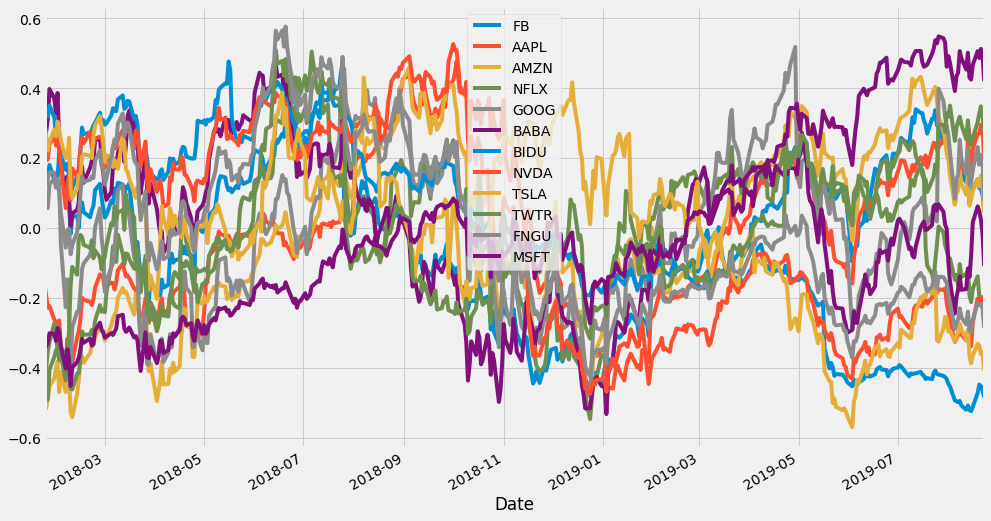

In [ ]:
def normIt(myDf):
   return (myDf - myDf.mean()) / (myDf.max() - myDf.min())

# df_apple_norm = normIt(AAPL)
# df_google_norm = normIt(google)
# df_nflx_norm = normIt(NFLX)
# df_FB_norm = normIt(FB)
# df_AMZN_norm = normIt(AMZN)
# df_BABA_norm = normIt(BABA)
# df_BIDU_norm = normIt(BIDU)
# df_NVDA_norm = normIt(NVDA)
# df_TSLA_norm = normIt(TSLA)
# df_TWTR_norm = normIt(TWTR)

# df_microsoft_norm = normIt(microsoft)
stocks_norm = normIt(stocks)
stocks_norm= stocks_norm.dropna()
stocks_norm.plot()

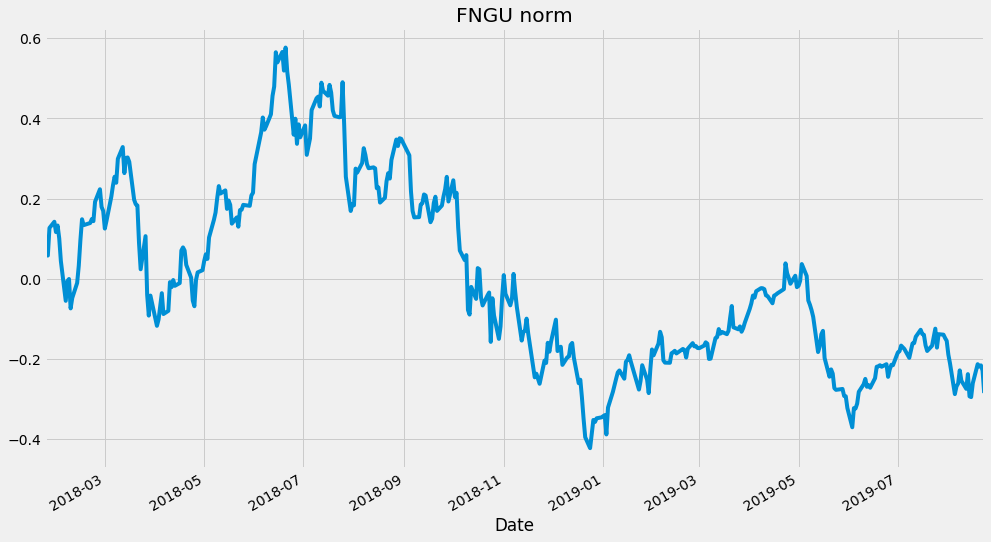

In [ ]:
stocks_norm.FNGU.plot(grid = True,title = "FNGU norm")

In [ ]:
stocks_norm.head()

,FB,AAPL,AMZN,NFLX,GOOG,BABA,BIDU,NVDA,TSLA,TWTR,FNGU,MSFT
Date,,,,,,,,,,,,
2018-01-23,0.174296,-0.161142,-0.507634,-0.456780,0.140927,0.237135,0.336177,0.212998,0.297657,-0.466329,0.060022,-0.336281
2018-01-24,0.144331,-0.192333,-0.514821,-0.397296,0.122524,0.277628,0.339392,0.193853,0.263260,-0.481776,0.058305,-0.337616
2018-01-25,0.154283,-0.226732,-0.485617,-0.351912,0.142212,0.312515,0.319257,0.197239,0.222134,-0.490313,0.057680,-0.329105
2018-01-26,0.181253,-0.222308,-0.451184,-0.325439,0.159780,0.398361,0.351462,0.240208,0.248106,-0.404541,0.126542,-0.300236
2018-01-29,0.138230,-0.261573,-0.428853,-0.271465,0.158945,0.370825,0.317096,0.261877,0.281406,-0.367549,0.142001,-0.302572


# ...

In [ ]:
corrwith = stocks_norm.corr()
corrwith

,FB,AAPL,AMZN,NFLX,GOOG,BABA,BIDU,NVDA,TSLA,TWTR,FNGU,MSFT
FB,1.000000,0.291704,0.374470,0.520310,0.529610,0.706917,0.101377,0.293321,-0.300204,0.624086,0.479710,0.289951
AAPL,0.291704,1.000000,0.798470,0.445827,0.591064,-0.035744,-0.141820,0.333097,-0.333342,0.243223,0.249469,0.544729
AMZN,0.374470,0.798470,1.000000,0.666472,0.677195,-0.055680,-0.385482,0.016085,-0.471968,0.418876,0.082809,0.768406
NFLX,0.520310,0.445827,0.666472,1.000000,0.548758,0.342047,0.007679,0.183219,-0.292698,0.493416,0.384471,0.360431
GOOG,0.529610,0.591064,0.677195,0.548758,1.000000,0.384375,-0.020848,0.248581,-0.158038,0.356384,0.377817,0.435460
BABA,0.706917,-0.035744,-0.055680,0.342047,0.384375,1.000000,0.542826,0.496229,0.122305,0.308363,0.666539,-0.226533
BIDU,0.101377,-0.141820,-0.385482,0.007679,-0.020848,0.542826,1.000000,0.834943,0.657467,-0.134694,0.840971,-0.830768
NVDA,0.293321,0.333097,0.016085,0.183219,0.248581,0.496229,0.834943,1.000000,0.368221,-0.043639,0.898072,-0.508673
TSLA,-0.300204,-0.333342,-0.471968,-0.292698,-0.158038,0.122305,0.657467,0.368221,1.000000,-0.210699,0.446087,-0.723243
TWTR,0.624086,0.243223,0.418876,0.493416,0.356384,0.308363,-0.134694,-0.043639,-0.210699,1.000000,0.273407,0.418048


In [ ]:
corr_cumSum= corrwith.cumsum()
corr_cumSum

,FB,AAPL,AMZN,NFLX,GOOG,BABA,BIDU,NVDA,TSLA,TWTR,FNGU,MSFT
FB,1.000000,0.291704,0.374470,0.520310,0.529610,0.706917,0.101377,0.293321,-0.300204,0.624086,0.479710,0.289951
AAPL,1.291704,1.291704,1.172940,0.966137,1.120674,0.671174,-0.040442,0.626418,-0.633545,0.867309,0.729179,0.834680
AMZN,1.666174,2.090174,2.172940,1.632608,1.797870,0.615494,-0.425924,0.642503,-1.105514,1.286185,0.811988,1.603086
NFLX,2.186484,2.536001,2.839411,2.632608,2.346628,0.957541,-0.418246,0.825721,-1.398211,1.779601,1.196459,1.963517
GOOG,2.716094,3.127065,3.516607,3.181366,3.346628,1.341916,-0.439093,1.074302,-1.556250,2.135985,1.574276,2.398977
BABA,3.423011,3.091322,3.460927,3.523413,3.731003,2.341916,0.103732,1.570531,-1.433945,2.444348,2.240816,2.172444
BIDU,3.524388,2.949502,3.075445,3.531092,3.710155,2.884742,1.103732,2.405474,-0.776478,2.309654,3.081786,1.341676
NVDA,3.817709,3.282599,3.091530,3.714311,3.958736,3.380970,1.938676,3.405474,-0.408256,2.266015,3.979858,0.833003
TSLA,3.517506,2.949257,2.619562,3.421613,3.800698,3.503275,2.596142,3.773696,0.591744,2.055317,4.425946,0.109759
TWTR,4.141592,3.192480,3.038437,3.915029,4.157082,3.811638,2.461449,3.730057,0.381045,3.055317,4.699352,0.527807


In [ ]:
keepThese = corr_cumSum.loc[:, corr_cumSum.iloc[-1] > corr_cumSum.iloc[-1].mean()*1.1]
keepThese

,FB,AAPL,NFLX,GOOG,BABA,NVDA,FNGU
FB,1.000000,0.291704,0.520310,0.529610,0.706917,0.293321,0.479710
AAPL,1.291704,1.291704,0.966137,1.120674,0.671174,0.626418,0.729179
AMZN,1.666174,2.090174,1.632608,1.797870,0.615494,0.642503,0.811988
NFLX,2.186484,2.536001,2.632608,2.346628,0.957541,0.825721,1.196459
GOOG,2.716094,3.127065,3.181366,3.346628,1.341916,1.074302,1.574276
BABA,3.423011,3.091322,3.523413,3.731003,2.341916,1.570531,2.240816
BIDU,3.524388,2.949502,3.531092,3.710155,2.884742,2.405474,3.081786
NVDA,3.817709,3.282599,3.714311,3.958736,3.380970,3.405474,3.979858
TSLA,3.517506,2.949257,3.421613,3.800698,3.503275,3.773696,4.425946
TWTR,4.141592,3.192480,3.915029,4.157082,3.811638,3.730057,4.699352


In [ ]:
# keepThese = keepThese.loc[:, keepThese.iloc[-1] > keepThese.iloc[-1].mean()]
# keepThese

In [ ]:
dropAllButThese = keepThese.columns.to_list()
dropAllButThese.append("FNGU")
dropAllButThese=list(set(dropAllButThese))

In [ ]:
corrwith[dropAllButThese]#.cumsum()

,GOOG,FB,FNGU,NFLX
FB,0.529610,1.000000,0.479710,0.520310
AAPL,0.591064,0.291704,0.249469,0.445827
AMZN,0.677195,0.374470,0.082809,0.666472
NFLX,0.548758,0.520310,0.384471,1.000000
GOOG,1.000000,0.529610,0.377817,0.548758
BABA,0.384375,0.706917,0.666539,0.342047
BIDU,-0.020848,0.101377,0.840971,0.007679
NVDA,0.248581,0.293321,0.898072,0.183219
TSLA,-0.158038,-0.300204,0.446087,-0.292698
TWTR,0.356384,0.624086,0.273407,0.493416


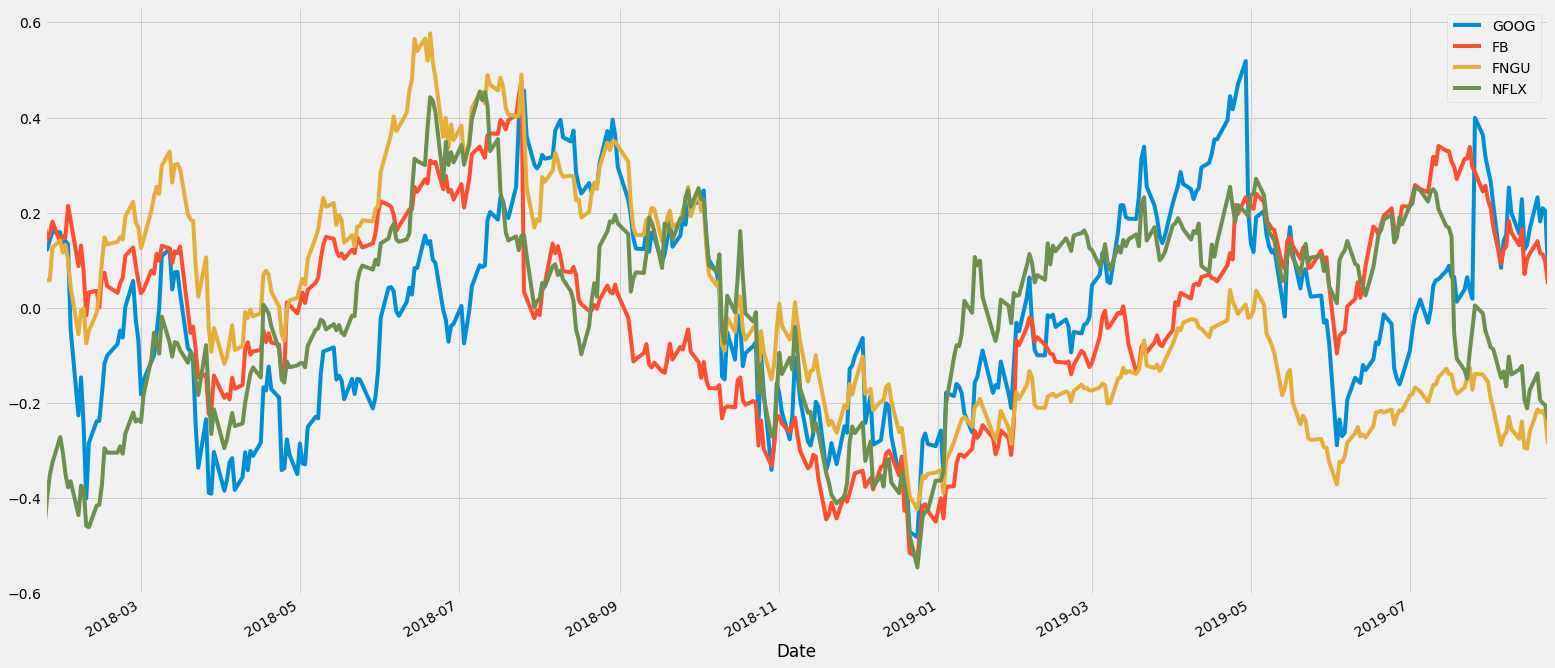

In [ ]:
stocks_main = stocks[dropAllButThese]
stocks_main_norm= normIt(stocks_main)
stocks_main_norm.plot(figsize=(24,12))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cb71f4710>,
      dtype=object)

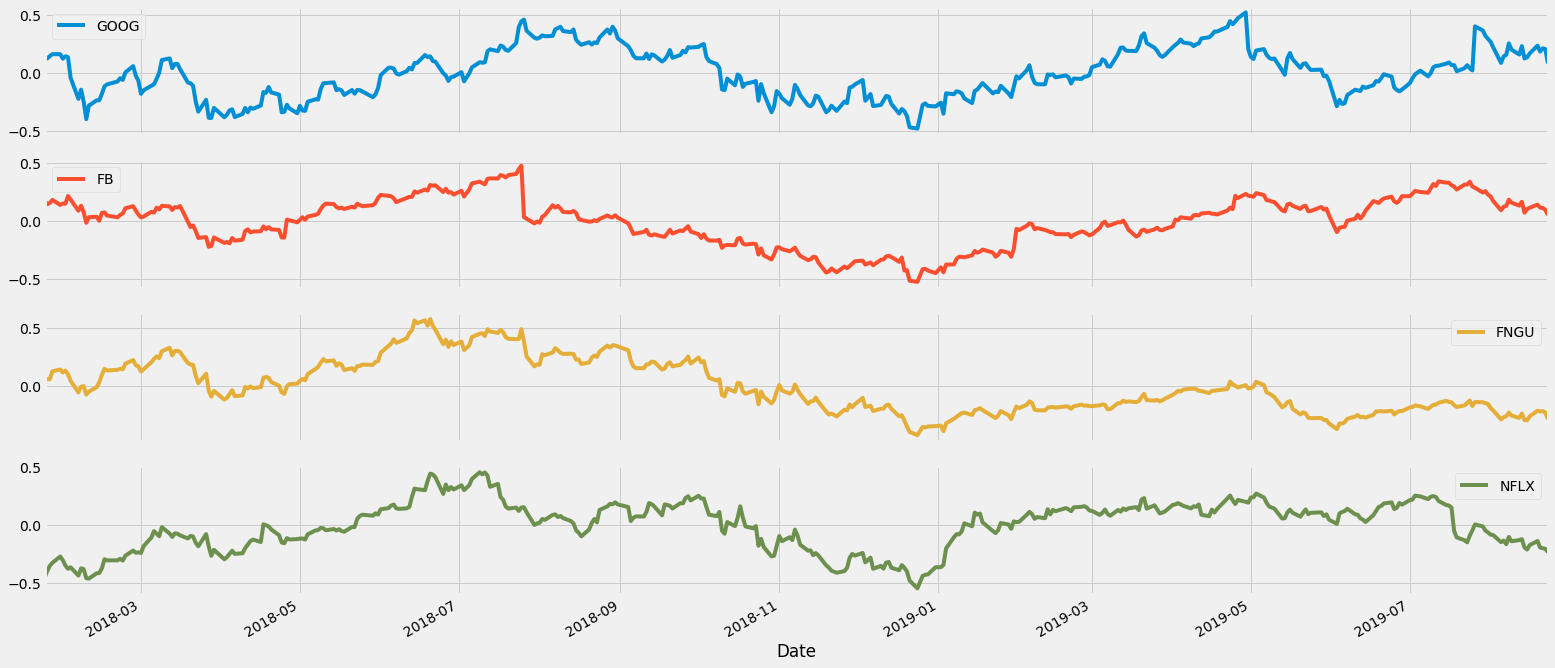

In [ ]:
#stocks = stocks.loc[:,~stocks.columns.duplicated()]
stocks_main_norm.plot(subplots=True, figsize=(24, 12))

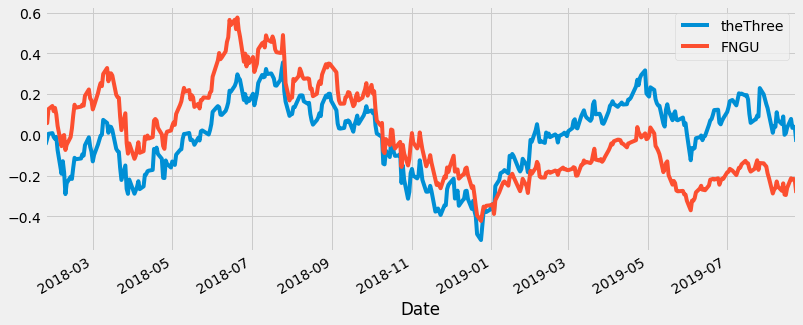

In [ ]:
theThree = stocks.GOOG + stocks.FB + stocks.NFLX
theThree /=3

quickDF= pd.DataFrame({
    'theThree': theThree,
    'FNGU': normIt(web.DataReader("FNGU", "yahoo", start, end).Close)
})
quickDF.plot(figsize = (12,5))

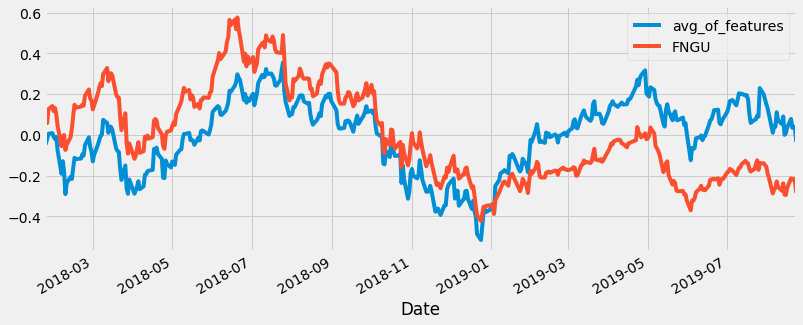

In [ ]:
try:
  fngu = stocks_main_norm.FNGU
  stocks_main_norm=stocks_main_norm.drop(["FNGU"], axis=1)
except:
  None

# avg_of_features = 0
# temp = None

# for ticker in stocks_main_norm.columns:
#   temp += stocks_main_norm[ticker]
#   print(ticker)

theThree = stocks.GOOG + stocks.FB + stocks.NFLX
theThree /=3

quickDF= pd.DataFrame({
    'avg_of_features': stocks_main_norm.mean(axis=1),
    'FNGU': fngu #normIt(web.DataReader("FNGU", "yahoo", start, end).Close)
})
quickDF.plot(figsize = (12,5))

# Prediction



/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


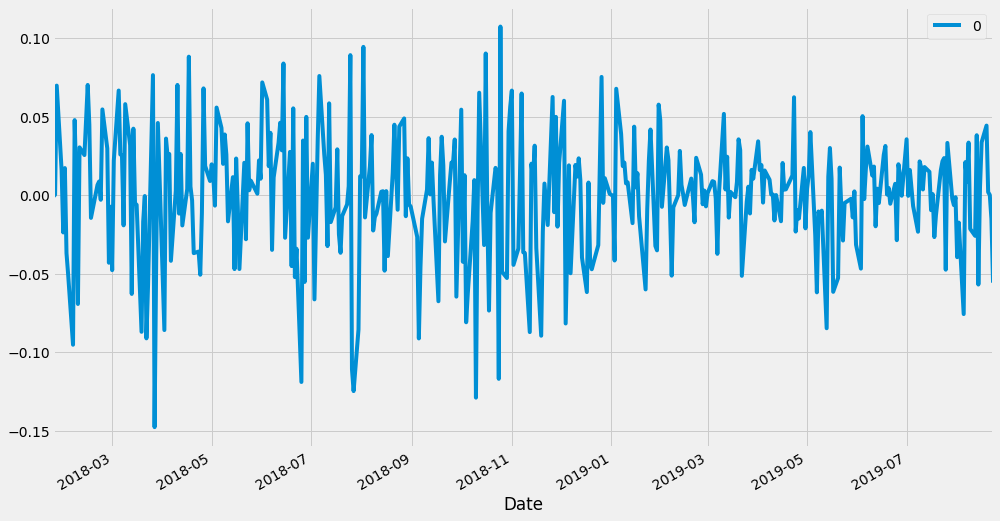

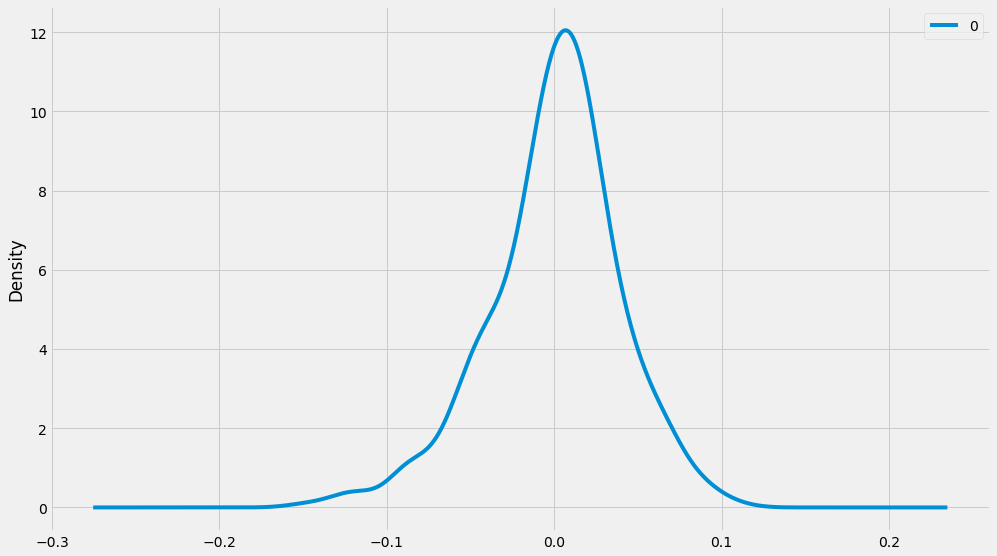

                0
count  399.000000
mean    -0.000004
std      0.039233
min     -0.147822
25%     -0.019313
50%      0.003066
75%      0.022069
max      0.107333


In [ ]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
  

model = ARIMA(quickDF["FNGU"], order=(5,1,0))
model_fit = model.fit(disp=0)
#print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())




predicted=-0.215504, expected=-0.216051
predicted=-0.219902, expected=-0.184196
predicted=-0.180202, expected=-0.181229
predicted=-0.182776, expected=-0.167176
predicted=-0.168139, expected=-0.175608
predicted=-0.173835, expected=-0.197781
predicted=-0.200754, expected=-0.179512
predicted=-0.178738, expected=-0.161710
predicted=-0.164351, expected=-0.160930
predicted=-0.162685, expected=-0.145002
predicted=-0.141872, expected=-0.127670
predicted=-0.128056, expected=-0.138288
predicted=-0.140322, expected=-0.140162
predicted=-0.139074, expected=-0.166395
predicted=-0.167376, expected=-0.180511
predicted=-0.183213, expected=-0.167332
predicted=-0.167175, expected=-0.145783
predicted=-0.148270, expected=-0.124859
predicted=-0.124186, expected=-0.172173
predicted=-0.171531, expected=-0.138600
predicted=-0.136922, expected=-0.139849
predicted=-0.141447, expected=-0.148282
predicted=-0.153855, expected=-0.155355
predicted=-0.149573, expected=-0.189661
predicted=-0.193327, expected=-0.211210


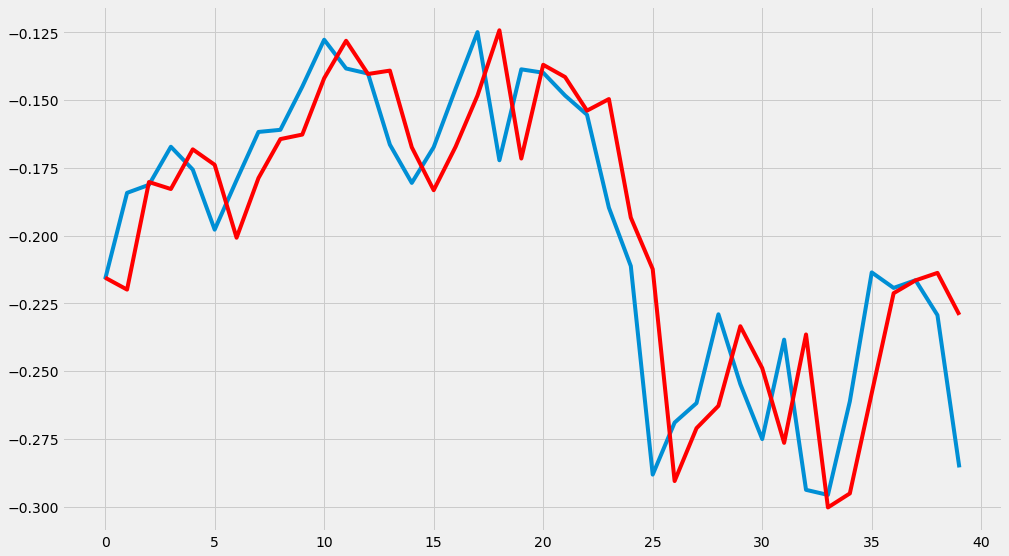

In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

X = quickDF["FNGU"].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test+10)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.5f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# ARIMA to forecast 

predicted=-0.222935, expected=-0.216051
predicted=-0.229733, expected=-0.184196
predicted=-0.182133, expected=-0.181229
predicted=-0.184063, expected=-0.167176
predicted=-0.163586, expected=-0.175608
predicted=-0.175740, expected=-0.197781
predicted=-0.189614, expected=-0.179512
predicted=-0.174193, expected=-0.161710
predicted=-0.166314, expected=-0.160930
predicted=-0.157862, expected=-0.145002
predicted=-0.142313, expected=-0.127670
predicted=-0.129293, expected=-0.138288
predicted=-0.134581, expected=-0.140162
predicted=-0.139571, expected=-0.166395
predicted=-0.170881, expected=-0.180511
predicted=-0.174546, expected=-0.167332
predicted=-0.155253, expected=-0.145783
predicted=-0.124055, expected=-0.124859
predicted=-0.106652, expected=-0.172173
predicted=-0.168051, expected=-0.138600
predicted=-0.149417, expected=-0.139849
predicted=-0.135372, expected=-0.148282
predicted=-0.126222, expected=-0.155355
predicted=-0.144068, expected=-0.189661
predicted=-0.174045, expected=-0.211210


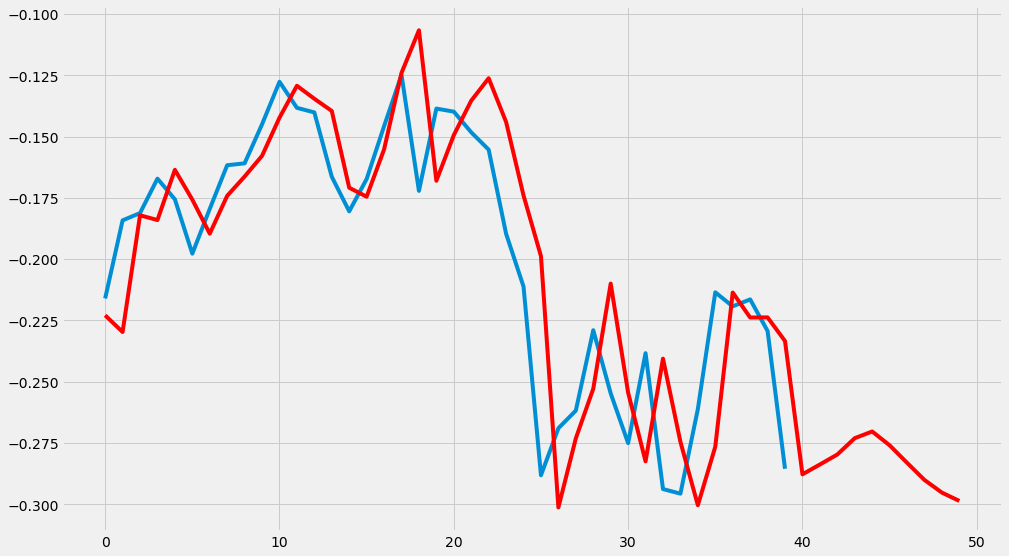

In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

X = quickDF["FNGU"].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
#print (history==train) #True 
for t in range(len(test)+10):
    model = ARIMA(history[-1*len(test):], order=(5,1,0)) # changed*
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    try:
      obs = test[t]
    except IndexError:
      obs = yhat
	

    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
 
# error = mean_squared_error(test, predictions)
# print('Test MSE: %.5f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
import numpy as np

#stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change = stocks.apply(lambda x: (x) - (x.shift(1))) # shift moves dates back by 1.
stock_change=stock_change.dropna()
stock_change.head()

,FB,AAPL,AMZN,NFLX,GOOG,BABA,BIDU,NVDA,TSLA,TWTR,FNGU,MSFT
Date,,,,,,,,,,,,
2018-01-24,-0.029966,-0.031191,-0.007187,0.059485,-0.018403,0.040493,0.003215,-0.019145,-0.034397,-0.015447,-0.001718,-0.001335
2018-01-25,0.009953,-0.034399,0.029204,0.045383,0.019688,0.034887,-0.020135,0.003386,-0.041127,-0.008537,-0.000625,0.008511
2018-01-26,0.026969,0.004424,0.034433,0.026474,0.017568,0.085846,0.032205,0.042969,0.025972,0.085772,0.068862,0.028869
2018-01-29,-0.043022,-0.039265,0.022331,0.053974,-0.000835,-0.027536,-0.034366,0.021669,0.033300,0.036992,0.015459,-0.002336
2018-01-30,0.012200,-0.010950,0.028775,-0.031282,-0.038187,-0.041739,-0.050917,-0.025425,-0.018494,0.017886,-0.025765,-0.019691


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cb87ca898>,
      dtype=object)

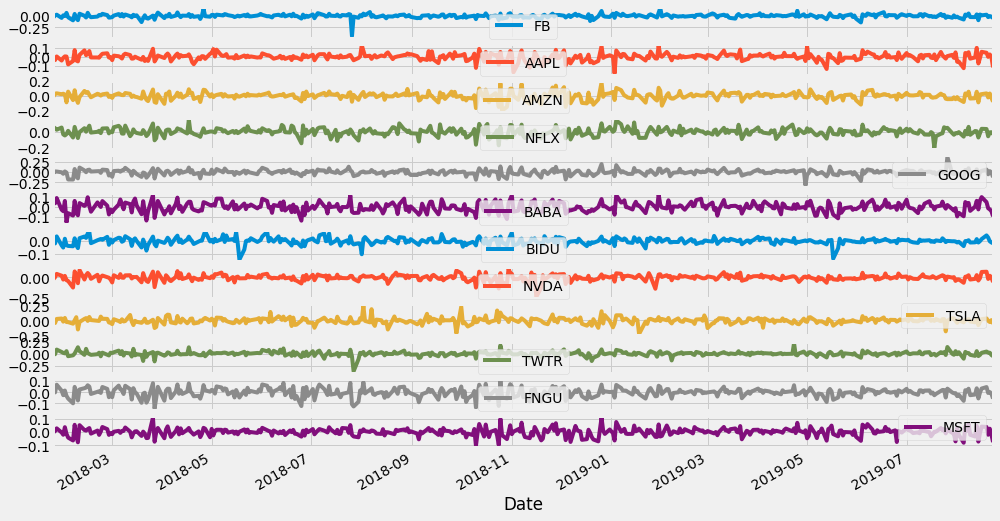

In [ ]:
stock_change.plot(grid = True,subplots=True)#.axhline(y = 0, color = "black", lw = 2)

In [ ]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip


     | 768kB 1.6MB/s
  Created wheel for mpl-finance: filename=mpl_finance-0.10.0-cp36-none-any.whl size=5510 sha256=035403b1ed1141dd25a9241979b18af77c1d651ca99ec82cfad2c1b00a8f1989
  Stored in directory: /tmp/pip-ephem-wheel-cache-40p40m7c/wheels/8f/bf/8a/6c858b2a3be945c7b2d658fbf6ab797b451d686cbee8aa2679
Successfully built mpl-finance


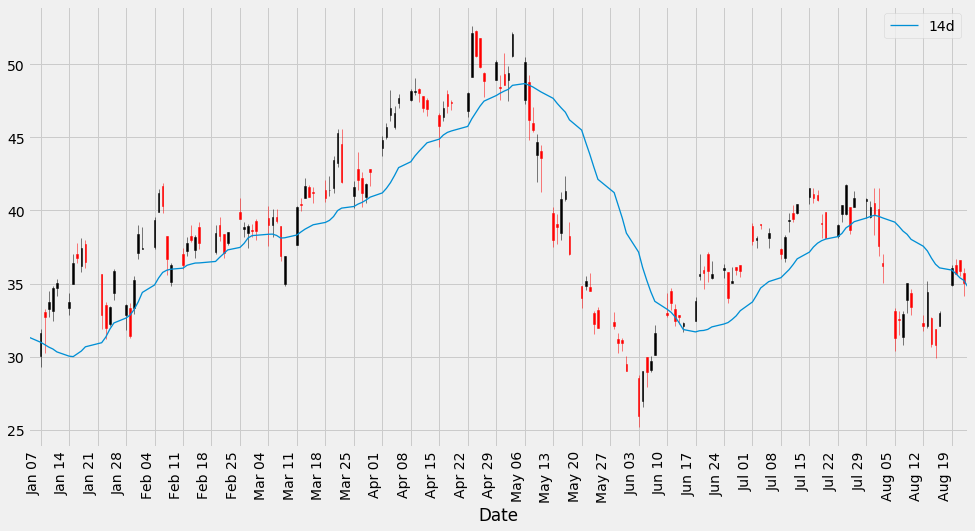

In [ ]:
 
from matplotlib.dates import DateFormatter, WeekdayLocator,    DayLocator, MONDAY
from mpl_finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
 
    plt.show()
 
#pandas_candlestick_ohlc(apple)
FNGU = web.DataReader("FNGU", "yahoo", start, end)

FNGU["14d"] = np.round(FNGU["Close"].rolling(window = 20, center = False).mean(), 2)
pandas_candlestick_ohlc(FNGU.loc['2019-01-04':], otherseries = "14d") # FNGU.loc['201-01-04':'2016-08-07',:]

does the PCA of the lesser CORR fetures assist in forcasting an index? 